### Análise exploratória dos dados já processados


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv(r'../data/processed/ipca.csv', index_col='Unnamed: 0')
pd.options.display.max_columns = 14
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
dataframe.info()
df = dataframe.copy()

df['periodo'] = pd.to_datetime(df['periodo'])

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 0 to 466
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   periodo  467 non-null    object 
 1   valor    467 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.9+ KB


# Estatísticas descritivas

In [2]:
df['valor'].describe()


count    467.000000
mean       5.972463
std       11.502486
min        0.130000
25%        0.840000
50%        1.200000
75%        2.575000
max       82.040000
Name: valor, dtype: float64

# Visão Geral


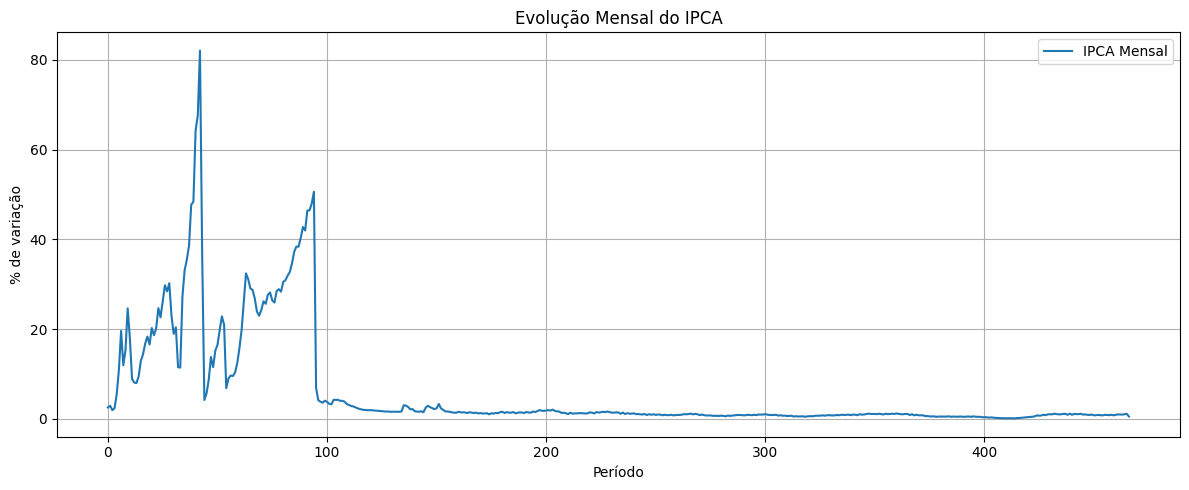

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['valor'], label='IPCA Mensal')
plt.title('Evolução Mensal do IPCA')
plt.ylabel('% de variação')
plt.xlabel('Período')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Média móvel

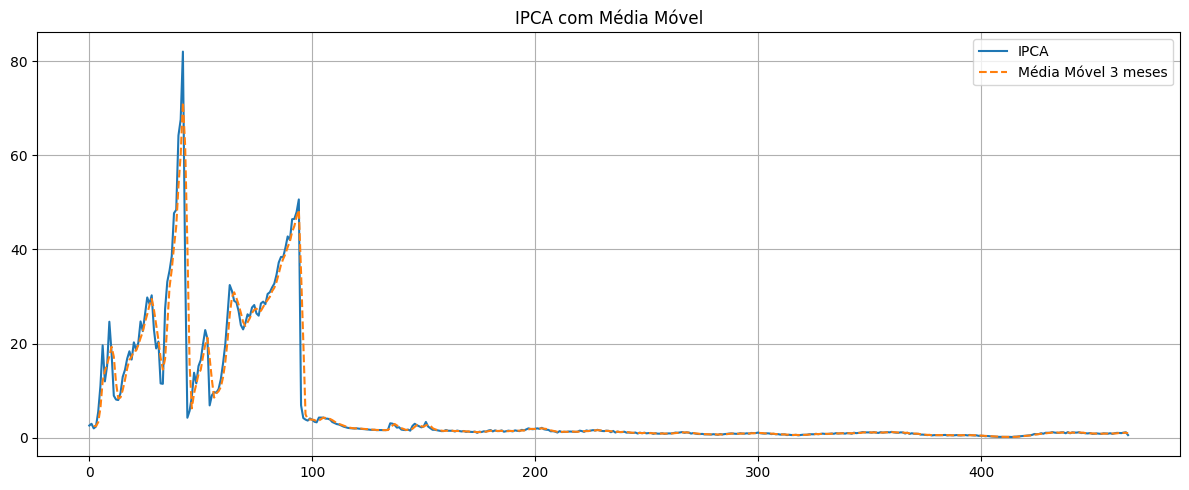

In [4]:
df['media_movel_3m'] = df['valor'].rolling(3).mean()

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['valor'], label='IPCA')
plt.plot(df.index, df['media_movel_3m'], linestyle='--', label='Média Móvel 3 meses')
plt.title('IPCA com Média Móvel')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Sazonalidade (por mês)

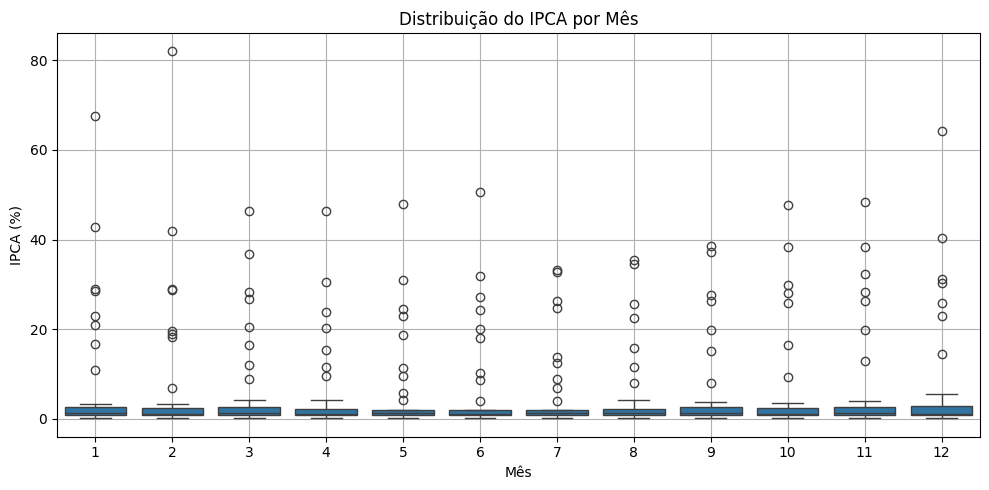

In [5]:
df.set_index('periodo', inplace=True)

df['ano'] = df.index.year
df['mes'] = df.index.month

plt.figure(figsize=(10, 5))
sns.boxplot(x='mes', y='valor', data=df)
plt.title('Distribuição do IPCA por Mês')
plt.xlabel('Mês')
plt.ylabel('IPCA (%)')
plt.grid()
plt.tight_layout()
plt.show()

# Decomposição da série temporal

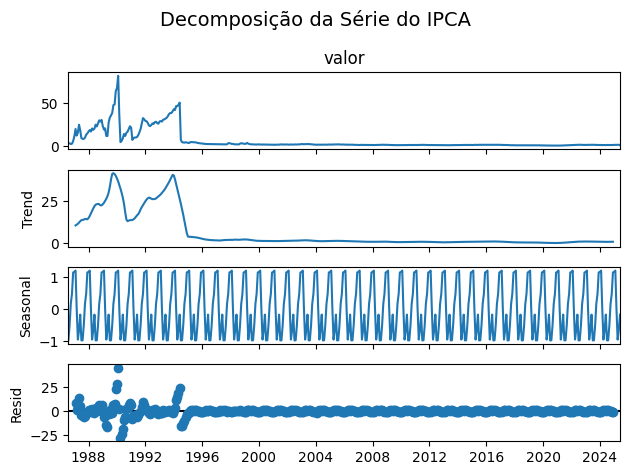

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao = seasonal_decompose(df['valor'], model='additive', period=12)
decomposicao.plot()
plt.suptitle("Decomposição da Série do IPCA", fontsize=14)
plt.tight_layout()
plt.show()
